<h1>Feature Selection Using Most Correlated Features to Target</h1>

In [1]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

<h3>A - Define features and target of Correlation</h3>

In [2]:
feature_columns = [
    'month-day',
    'month',
    'day_in_month',
    'adep', 
    'country_code_adep', 
    'ades', 
    'country_code_ades', 
    'aircraft_type', 
    'wtc', 
    'airline', 
    'flight_duration', 
    'taxiout_time', 
    'flown_distance', 
    'actual_offblock_time_hour', 
    'actual_offblock_time_minute', 
    'actual_offblock_time_hour_minute', 
    'arrival_time_hour', 
    'arrival_time_minute', 
    'arrival_time_hour_minute', 
    'latitude_median', 
    'longitude_median', 
    'altitude_mean', 
    'groundspeed_mean', 
    'track_mean', 
    'vertical_rate_mean', 
    'track_unwrapped_mean', 
    'u_component_of_wind_mean', 
    'v_component_of_wind_mean', 
    'temperature_mean', 
    'specific_humidity_mean'
]

target = 'tow'

<h3>B - Read encoded challenge dataset</h3>

In [3]:
encoded_challenge_set = pd.read_csv('../data/encoded_challenge_set.csv')

<h3>C - Calculate correlation between each feature column and 'tow'</h3>

,index,Feature,correlation with tow
0,8,wtc,0.924098
1,12,flown_distance,0.843368
2,10,flight_duration,0.835027
3,20,longitude_median,0.518953
4,22,groundspeed_mean,0.457464
5,21,altitude_mean,0.398620
6,11,taxiout_time,0.333763
7,28,temperature_mean,0.331538
8,6,country_code_ades,0.313012
9,4,country_code_adep,0.290257


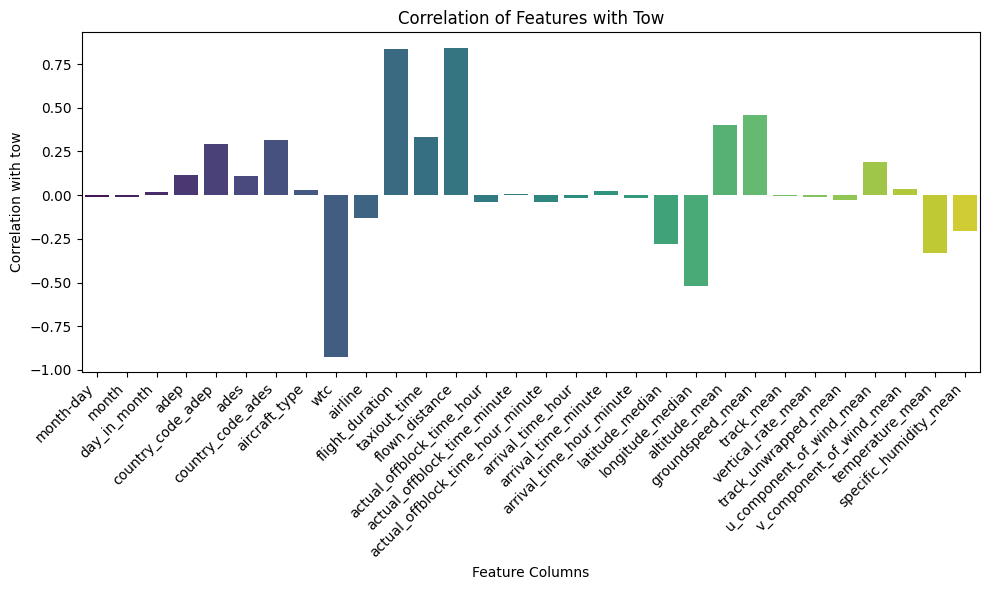

In [4]:
correlations = {}
for col in feature_columns:
    if col in encoded_challenge_set.columns:
        correlations[col] = encoded_challenge_set[col].corr(encoded_challenge_set['tow'])

# Convert correlations to a DataFrame for easier plotting
correlation_df = pd.DataFrame.from_dict(correlations, orient='index', columns=['correlation with tow']).reset_index()
correlation_df.rename(columns={'index': 'Feature'}, inplace=True)

abs_correlation_df = correlation_df.copy()
abs_correlation_df['correlation with tow'] = abs_correlation_df['correlation with tow'].abs()
sorted_correlation_df = abs_correlation_df.sort_values(by='correlation with tow', ascending=False).reset_index()
display(sorted_correlation_df)

# Plotting the correlations
plt.figure(figsize=(10, 6))
sns.barplot(
    data=correlation_df, 
    x='Feature', 
    y='correlation with tow', 
    hue='Feature', 
    dodge=False, 
    palette='viridis', 
    legend=False
)
plt.xticks(rotation=45, ha='right')
plt.xlabel('Feature Columns')
plt.ylabel('Correlation with tow')
plt.title('Correlation of Features with Tow')
plt.tight_layout()
plt.show()

<h3>D - Train several models to compare with by adding one top correlated feature at a time</h3>

In [5]:
# Function to score model using Root Mean Square Error
def rmse(y_true: pd.Series, y_pred: pd.Series) -> int:
    return np.sqrt(mean_squared_error(y_true, y_pred))

In [6]:
sorted_correlated_features = sorted_correlation_df['Feature'].tolist()
number_of_top_features = []
rmse_scores = []

for n in range(1, len(sorted_correlated_features)+1):
    current_top_features = sorted_correlated_features[:n]
    
    features = encoded_challenge_set[current_top_features]
    
    target = encoded_challenge_set['tow']
    
    X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.3, random_state=123, shuffle=True)
    
    rf = RandomForestRegressor(
        n_estimators=11, # From elbow graph in CV Grid Search 
    )
    
    rf.fit(X_train, y_train)
    
    y_pred = rf.predict(X_test)
    test_rmse = rmse(y_test, y_pred)

    number_of_top_features.append(n)
    rmse_scores.append(test_rmse)
    
    print(f"Number of top features: {n}, Test RMSE: {test_rmse}")

Number of top features: 1, Test RMSE: 20482.64257827386
Number of top features: 2, Test RMSE: 15816.5716956181
Number of top features: 3, Test RMSE: 16178.5793652511
Number of top features: 4, Test RMSE: 13016.571407629895
Number of top features: 5, Test RMSE: 12385.758865220452
Number of top features: 6, Test RMSE: 11393.696669710247
Number of top features: 7, Test RMSE: 10426.060628209258
Number of top features: 8, Test RMSE: 10336.391307607057
Number of top features: 9, Test RMSE: 9364.959314508731
Number of top features: 10, Test RMSE: 8424.820381410602
Number of top features: 11, Test RMSE: 8225.622881176834
Number of top features: 12, Test RMSE: 8155.964726520622
Number of top features: 13, Test RMSE: 8143.091992488223
Number of top features: 14, Test RMSE: 7704.610085995397
Number of top features: 15, Test RMSE: 7577.080515446539
Number of top features: 16, Test RMSE: 7270.509862341626
Number of top features: 17, Test RMSE: 7037.383877166137
Number of top features: 18, Test RMSE

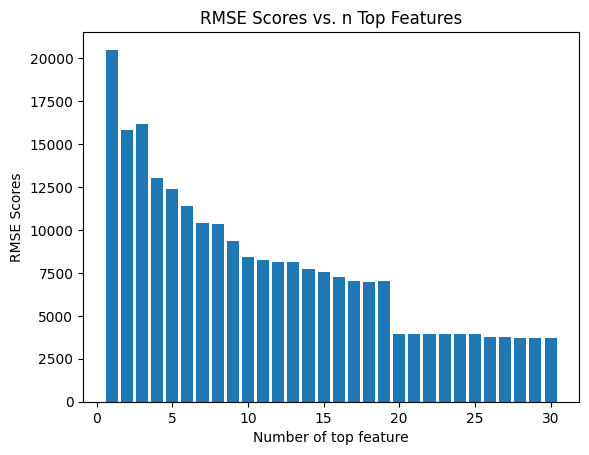

In [7]:
plt.bar(number_of_top_features, rmse_scores)
plt.xlabel('Number of top feature')
plt.ylabel('RMSE Scores')
plt.title('RMSE Scores vs. n Top Features')
plt.show()